In [67]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [68]:
# 读取数据C:\MyProject\MIMIC-IPE\data\icu_data.csv
data = pd.read_csv('C:/MyProject/MIMIC-IPE/data/icu_data.csv')
# 获取data中的所有列名、列中空值计数和列中空值占比，形成一个新的DataFrame
data_info = pd.DataFrame(data.columns, columns=['column_name'])
data_info['missing_count'] = data.isnull().sum().values
# 将空值占比转换为百分数形式
data_info['missing_rate'] = (data.isnull().sum().values / data.shape[0] * 100).round(2)
# 删除data中所有列名最后两位字符串为“_1”的列
data = data.drop(data.columns[data.columns.str.endswith('_1')], axis=1)
# 删除data中所有列名最后两位字符串为“_2”的列
data = data.drop(data.columns[data.columns.str.endswith('_2')], axis=1)
# 获取data中的所有列名、列中空值计数和列中空值占比，形成一个新的DataFrame
data_info = pd.DataFrame(data.columns, columns=['column_name'])
data_info['missing_count'] = data.isnull().sum().values
# 将空值占比转换为百分数形式
data_info['missing_rate'] = (data.isnull().sum().values / data.shape[0] * 100).round(2)
# 删除data中缺失值超过50%的列
data = data.drop(data_info[data_info['missing_rate'] > 10]['column_name'], axis=1)
# 获取data中的所有列名、列中空值计数和列中空值占比，形成一个新的DataFrame
data_info = pd.DataFrame(data.columns, columns=['column_name'])
data_info['missing_count'] = data.isnull().sum().values
# 将空值占比转换为百分数形式
data_info['missing_rate'] = (data.isnull().sum().values / data.shape[0] * 100).round(2)
# 设置subject_id、hadm_id和stay_id为索引
data = data.set_index(['subject_id'])
'''
删除以下列：
hadm_id
stay_id
blood_count_hematocrit
blood_count_hemoglobin
blood_count_mch
blood_count_mchc
blood_count_mcv
blood_count_platelet
blood_count_rbc
blood_count_rdw
blood_count_wbc
coagulation_ptt
'''
data = data.drop(['hadm_id', 'stay_id', 'blood_count_hematocrit', 'blood_count_hemoglobin', 'blood_count_mch',
                  'blood_count_mchc', 'blood_count_mcv', 'blood_count_platelet', 'blood_count_rbc',
                  'blood_count_rdw', 'blood_count_wbc', 'coagulation_ptt'], axis=1)
'''删除以下列：
hospstay_seq
first_hosp_stay
icustay_seq
first_icu_stay
icd_code
icd_version
admittime
dischtime
icu_intime
avg_los
'''
data = data.drop(['hospstay_seq', 'first_hosp_stay', 'icustay_seq', 'first_icu_stay', 'icd_code', 'icd_version',
                  'admittime', 'dischtime', 'icu_intime', 'avg_los'], axis=1)
# 获取data中的所有列名、列中空值计数和列中空值占比，形成一个新的DataFrame
data_info = pd.DataFrame(data.columns, columns=['column_name'])
data_info['missing_count'] = data.isnull().sum().values
# 将空值占比转换为百分数形式
data_info['missing_rate'] = (data.isnull().sum().values / data.shape[0] * 100).round(2)
'''提取以下几列，以下几列是待比较的值，形成一个新的dataframe：
hospital_expire_flag
re_inhosp
icu_count
14-days
7-days
31-days
los_icu
'''
data_compare = data[['hospital_expire_flag', 're_inhosp', 'icu_count', '14-days', '31-days', 'los_icu']]
# 从data中删除以上列
data = data.drop(['hospital_expire_flag', 're_inhosp', 'icu_count', '14-days', '31-days', 'los_icu'], axis=1)


# data中的gender列使用labelencoder进行编码
from sklearn.preprocessing import LabelEncoder
# Instantiate the LabelEncoder
labelencoder = LabelEncoder()
# Fit and transform the 'gender' column in 'X'
data['gender'] = labelencoder.fit_transform(data['gender'])
# data中的Group_label列使用labelencoder进行编码
# Fit and transform the 'Group_label' column in 'X'
data['Group_Label'] = labelencoder.fit_transform(data['Group_Label'])
# X中的race列使用one-hot编码，然后再将原race列删除，再把one-hot编码后的列加入X
# Perform one-hot encoding on the 'race' column
race_dummies = pd.get_dummies(data['race'], prefix='race')
# Drop the original 'race' column from 'data'
data = data.drop('race', axis=1)
# Concatenate 'data' with the one-hot encoded DataFrame
data = pd.concat([data, race_dummies], axis=1)
# X中其它列的空值使用均值填充
from sklearn.impute import SimpleImputer
# Instantiate the SimpleImputer
imputer = SimpleImputer(strategy='mean')
# Fit and transform the 'data' DataFrame
data = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

In [69]:
from imblearn.over_sampling import SMOTE

X = data.drop('7-days', axis=1)
y = data['7-days']
# 定义SMOTE实例
smote = SMOTE(random_state=42)

# 使用SMOTE进行过采样
X_resampled, y_resampled = smote.fit_resample(X, y)

# 将过采样后的特征和目标合并成新的DataFrame
oversample_data = pd.DataFrame(X_resampled, columns=X.columns)
oversample_data['7-days'] = y_resampled


Epoch 1/50
3/3 [==============================] - 0s 4ms/step - loss: 0.1328
Epoch 2/50
3/3 [==============================] - 0s 4ms/step - loss: 0.1317
Epoch 3/50
3/3 [==============================] - 0s 4ms/step - loss: 0.1308
Epoch 4/50
3/3 [==============================] - 0s 3ms/step - loss: 0.1301
Epoch 5/50
3/3 [==============================] - 0s 3ms/step - loss: 0.1294
Epoch 6/50
3/3 [==============================] - 0s 4ms/step - loss: 0.1287
Epoch 7/50
3/3 [==============================] - 0s 3ms/step - loss: 0.1279
Epoch 8/50
3/3 [==============================] - 0s 4ms/step - loss: 0.1270
Epoch 9/50
3/3 [==============================] - 0s 4ms/step - loss: 0.1261
Epoch 10/50
3/3 [==============================] - 0s 4ms/step - loss: 0.1250
Epoch 11/50
3/3 [==============================] - 0s 3ms/step - loss: 0.1239
Epoch 12/50
3/3 [==============================] - 0s 4ms/step - loss: 0.1226
Epoch 13/50
3/3 [==============================] - 0s 4ms/step - loss: 0.

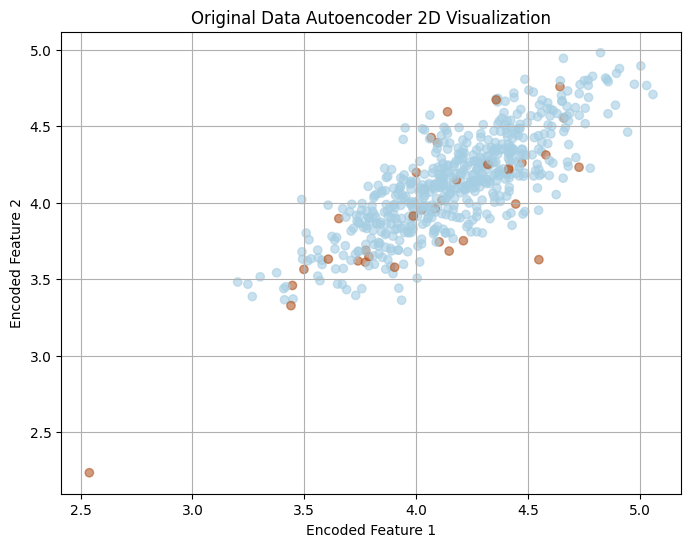

35/35 [==============================] - 0s 2ms/step


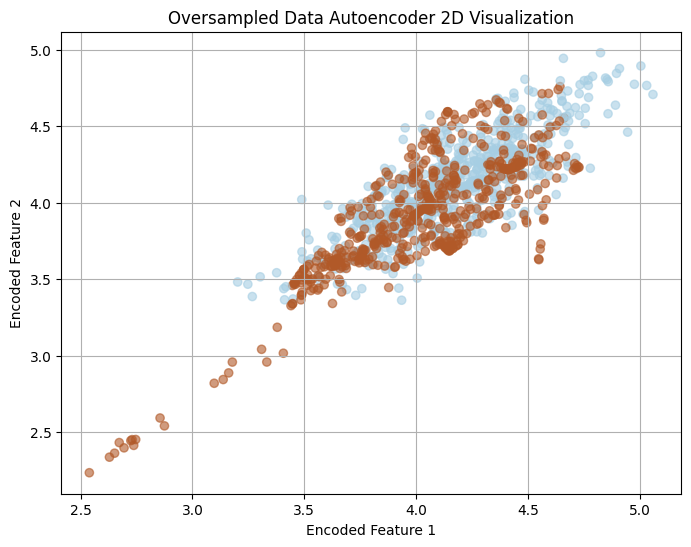

In [70]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from sklearn.preprocessing import MinMaxScaler

def build_and_train_autoencoder(data, encoding_dim=2):
    # 数据标准化
    scaler = MinMaxScaler()
    X_scaled = scaler.fit_transform(data.drop('7-days', axis=1))

    # 自编码器模型
    input_dim = X_scaled.shape[1]
    input_layer = Input(shape=(input_dim,))
    encoded = Dense(encoding_dim, activation='relu')(input_layer)
    decoded = Dense(input_dim, activation='sigmoid')(encoded)

    autoencoder = Model(input_layer, decoded)
    encoder = Model(input_layer, encoded)

    autoencoder.compile(optimizer='adam', loss='mean_squared_error')
    autoencoder.fit(X_scaled, X_scaled, epochs=50, batch_size=256, shuffle=True, verbose=1)

    return encoder, scaler

def plot_encoded_data(encoder, scaler, data, title):
    X = data.drop('7-days', axis=1)
    y = data['7-days'].values
    X_scaled = scaler.transform(X)
    X_encoded = encoder.predict(X_scaled)

    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(X_encoded[:, 0], X_encoded[:, 1], c=y, cmap='Paired', alpha=0.6)

    plt.title(title)
    plt.xlabel('Encoded Feature 1')
    plt.ylabel('Encoded Feature 2')
    plt.grid(True)
    plt.show()

# 假设data和oversample_data已经加载
encoder, scaler = build_and_train_autoencoder(data)
plot_encoded_data(encoder, scaler, data, 'Original Data Autoencoder 2D Visualization')
plot_encoded_data(encoder, scaler, oversample_data, 'Oversampled Data Autoencoder 2D Visualization')



In [71]:
from sklearn.calibration import calibration_curve
import optuna
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, brier_score_loss
import matplotlib.pyplot as plt
import numpy as np

# 定义目标函数用于Optuna优化
def objective(trial, X_train, y_train, X_valid, y_valid):
    param = {
        'verbosity': 1,
        'objective': 'binary:logistic',
        'booster': 'gbtree',
        'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
        'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
        'max_depth': trial.suggest_int('max_depth', 1, 15),  # 扩大搜索范围
        'eta': trial.suggest_uniform('eta', 0.01, 0.1),
        'gamma': trial.suggest_uniform('gamma', 0.01, 0.1),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),  # 新增超参数
        'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),  # 新增超参数
        'grow_policy': 'lossguide'  # 固定为lossguide策略
    }
    model = xgb.XGBClassifier(**param)
    model.fit(X_train, y_train, eval_set=[(X_valid, y_valid)], early_stopping_rounds=50, verbose=False)
    preds = model.predict_proba(X_valid)[:, 1]
    auc = roc_auc_score(y_valid, preds)
    return auc

def train_evaluate(X, y, data_label):
    # 数据集分割
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

    # 运行Optuna优化
    study = optuna.create_study(direction='maximize')
    study.optimize(lambda trial: objective(trial, X_train, y_train, X_test, y_test), n_trials=500)

    # 训练模型
    best_params = study.best_trial.params
    model = xgb.XGBClassifier(**best_params)
    model.fit(X_train, y_train)

    # 模型评估
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    y_pred = model.predict(X_test)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    auc = roc_auc_score(y_test, y_pred_proba)
    accuracy = accuracy_score(y_test, y_pred)
    brier = brier_score_loss(y_test, y_pred_proba)

    # ROC曲线绘制
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'{data_label} ROC curve (area = {auc:.2f})')
    plt.plot([0, 1], [0, 1], linestyle='--', label='No Skill')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{data_label} ROC Curve')
    plt.legend()
    plt.show()

    # 校准曲线绘制
    plt.figure(figsize=(8, 6))
    fraction_of_positives, mean_predicted_value = calibration_curve(y_test, y_pred_proba, n_bins=10, strategy='uniform')
    plt.plot(mean_predicted_value, fraction_of_positives, 's-', label=f'{data_label}')
    plt.plot([0, 1], [0, 1], linestyle='--', label='Perfectly calibrated')
    plt.xlabel('Mean predicted value')
    plt.ylabel('Fraction of positives')
    plt.title(f'{data_label} Calibration Curve')
    plt.legend()
    plt.show()

    print(f"{data_label} - AUC: {auc:.2f}, Accuracy: {accuracy:.2f}, Brier Loss: {brier:.2f}")

    return model

[I 2024-04-24 14:30:51,028] A new study created in memory with name: no-name-36caf8e9-2382-467a-b005-de20c0b16298
C:\Users\ZhouNan\AppData\Local\Temp\ipykernel_4124\835991248.py:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
C:\Users\ZhouNan\AppData\Local\Temp\ipykernel_4124\835991248.py:16: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
C:\Users\ZhouNan\AppData\Local\Temp\ipykernel_4124\835991248.py:18: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3

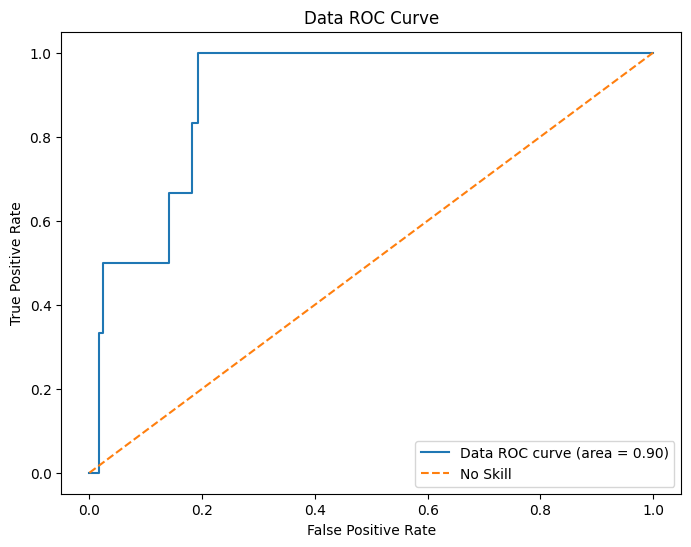

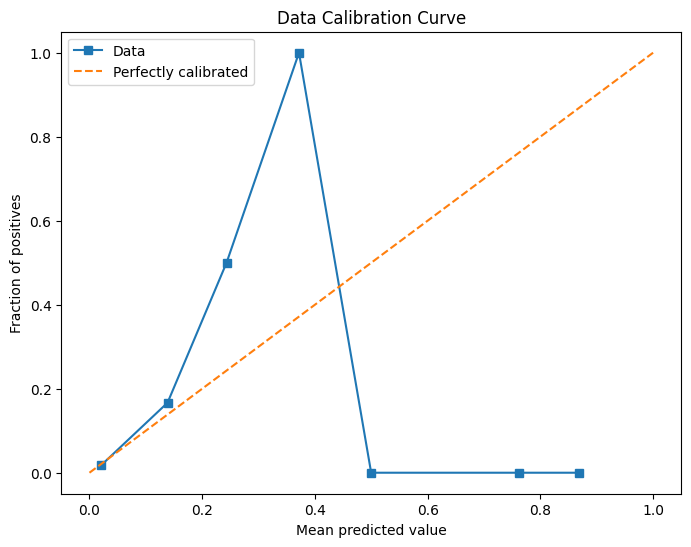

[I 2024-04-24 14:32:59,938] A new study created in memory with name: no-name-dcc92583-9006-413a-af4f-a9a2b3a3ae0d


Data - AUC: 0.90, Accuracy: 0.95, Brier Loss: 0.03


C:\Users\ZhouNan\AppData\Local\Temp\ipykernel_4124\835991248.py:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
C:\Users\ZhouNan\AppData\Local\Temp\ipykernel_4124\835991248.py:16: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
C:\Users\ZhouNan\AppData\Local\Temp\ipykernel_4124\835991248.py:18: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'eta': trial.suggest_uniform('eta', 0.01, 0.1),
C:\Users\ZhouNan\AppData\Local\

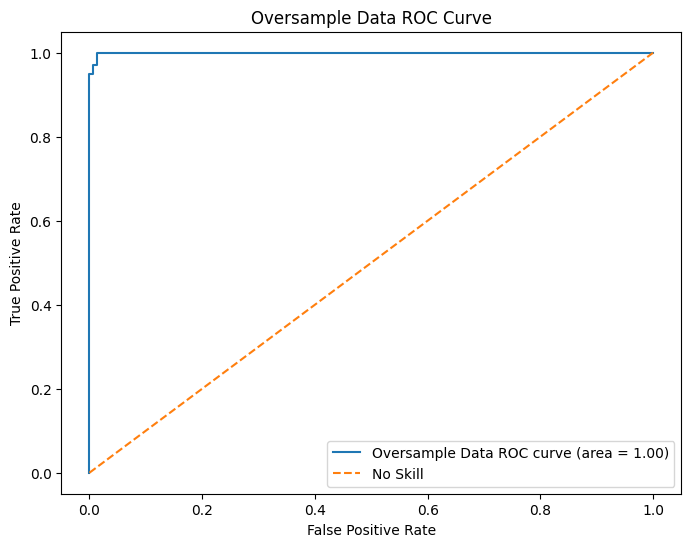

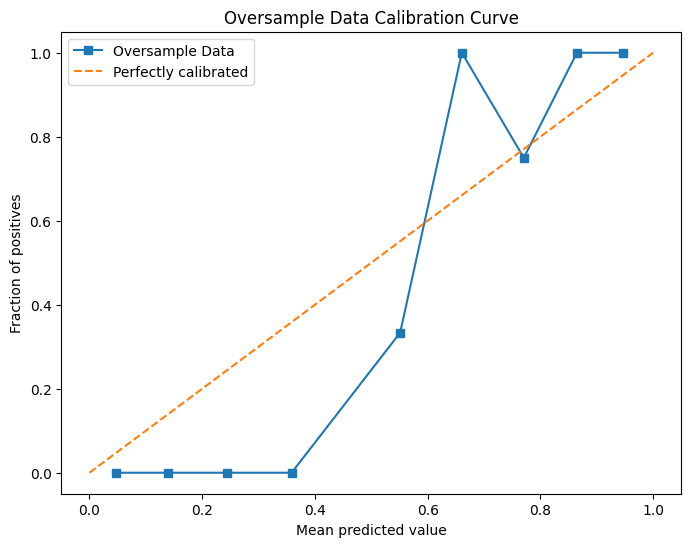

Oversample Data - AUC: 1.00, Accuracy: 0.99, Brier Loss: 0.02


In [72]:
model = train_evaluate(X, y, "Data")
model_oversample = train_evaluate(X_resampled, y_resampled, "Oversample Data")

[14:37:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


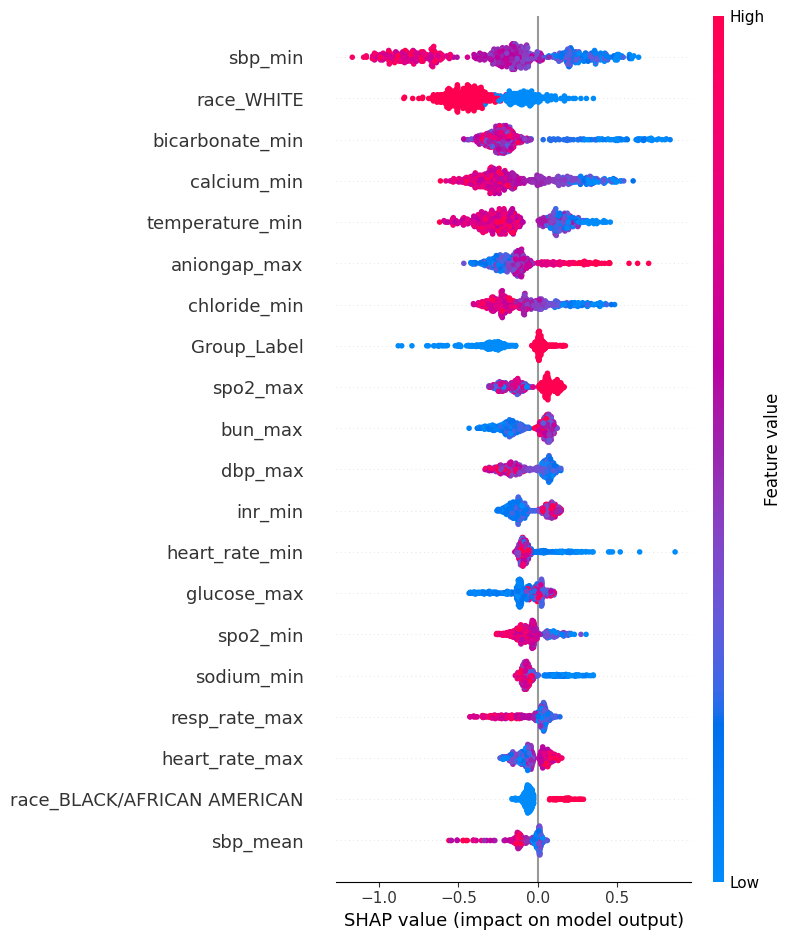

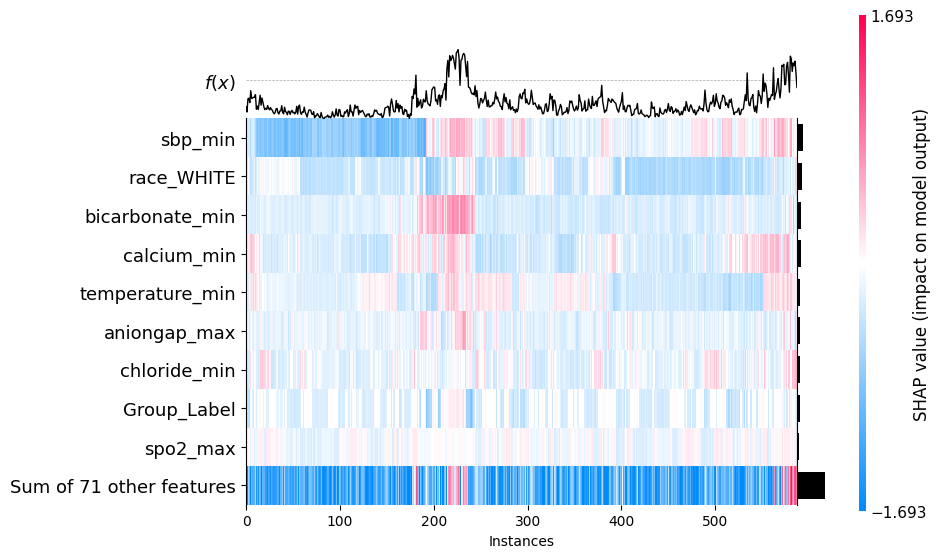

In [73]:
import shap

# 初始化JS可视化
shap.initjs()

# 创建一个解释器
explainer = shap.TreeExplainer(model_oversample)

shap_values = explainer.shap_values(X)

# 确保shap_values是numpy数组并具有正确的形状
shap_values = np.array(shap_values)

# 绘制摘要图
shap.summary_plot(shap_values, X)

# 绘制热图
shap.plots.heatmap(explainer(X), max_display=10)


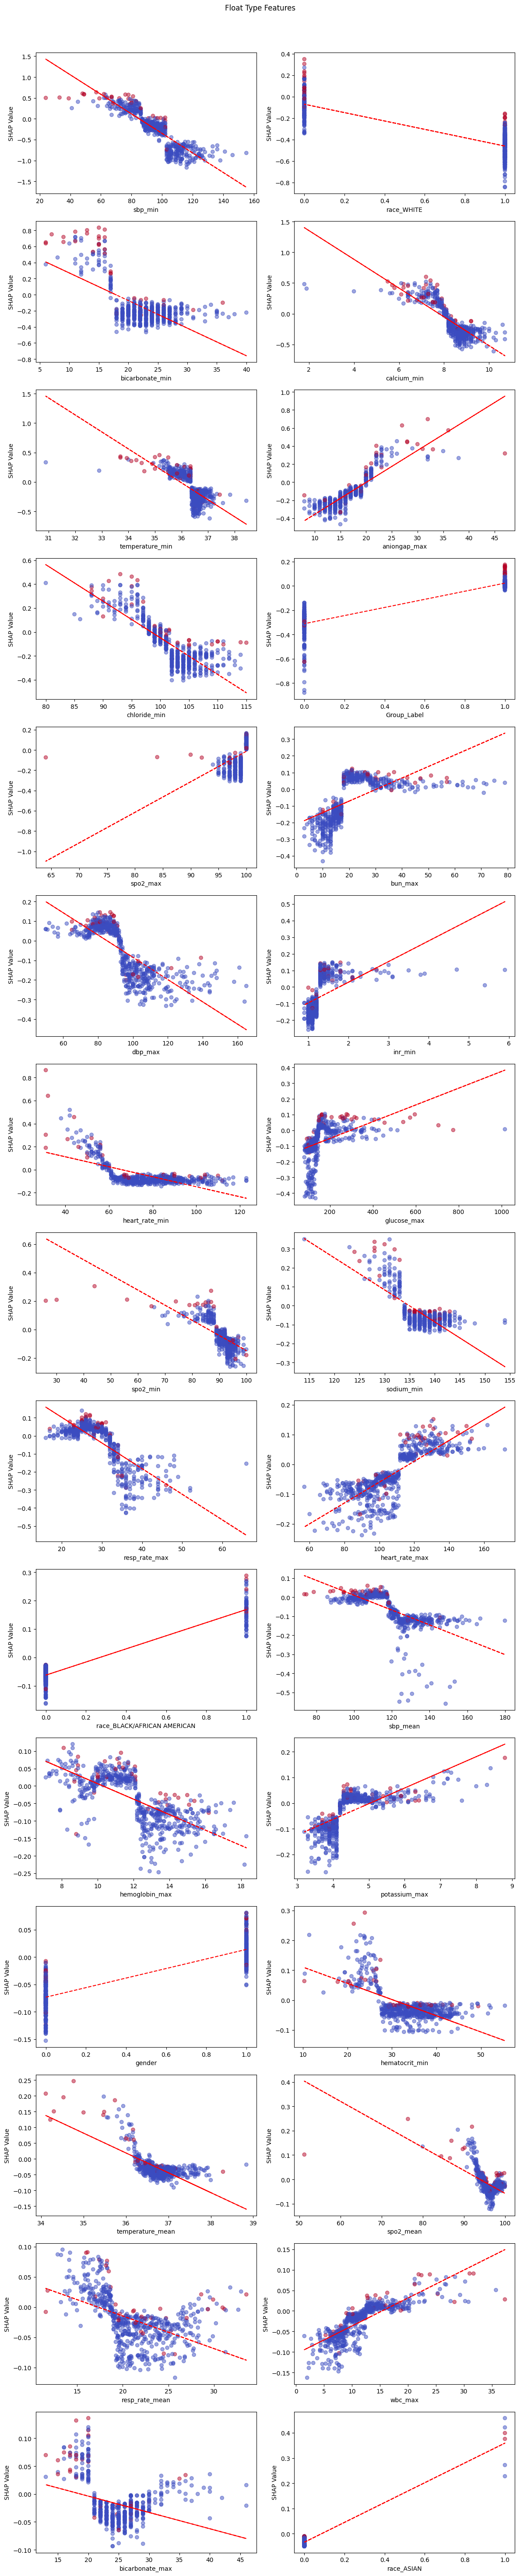

ValueError: Number of rows must be a positive integer, not 0

<Figure size 1200x0 with 0 Axes>

In [74]:
import matplotlib.pyplot as plt
import numpy as np

# 假设 X 是 DataFrame，确保X是一个numpy数组
X_np = X.values

# 获取SHAP值的平均绝对值，以确定最重要的特征
feature_importance = np.abs(shap_values).mean(axis=0)
top_features_indices = np.argsort(-feature_importance)[:30]  # 获取最重要的20个特征的索引
top_features_names = X.columns[top_features_indices]  # 获取这些特征的名称

# 确定每个特征的数据类型
float_indices = [i for i in top_features_indices if X.dtypes[X.columns[i]] == 'float']
int_indices = [i for i in top_features_indices if X.dtypes[X.columns[i]] == 'int64']

# 分别为浮点数和整数类型的特征创建图表
def create_plots(indices, title):
    n_features = len(indices)
    fig, axes = plt.subplots(n_features // 2 + n_features % 2, 2, figsize=(12, 2 * n_features))
    axes = axes.ravel()
    for j, idx in enumerate(indices):
        axes[j].scatter(X_np[:, idx], shap_values[:, idx], c=y, cmap='coolwarm', alpha=0.5,marker='o')
        # 添加趋势线
        z = np.polyfit(X_np[:, idx], shap_values[:, idx], 1)
        p = np.poly1d(z)
        axes[j].plot(X_np[:, idx], p(X_np[:, idx]), "r--")  # 红色虚线表示趋势线
        axes[j].set_xlabel(X.columns[idx])
        axes[j].set_ylabel('SHAP Value')
    for k in range(j + 1, len(axes)):
        fig.delaxes(axes[k])
    plt.suptitle(title)
    plt.tight_layout(rect=[0, 0, 1, 0.97])  # 调整布局使得标题可见
    plt.show()

# 为浮点数类型的特征绘制图表
create_plots(float_indices, "Float Type Features")

# 为整数类型的特征绘制图表
create_plots(int_indices, "Integer Type Features")
